## Project Name: Real-Time Communication System Powered by AI for Specially Abled

TEAM ID: PNT2022TMID14822


Model Building

Import The Required Model Building Libraries


In [1]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

IMPORTING tensorflow

In [4]:
import tensorflow as tf
import os

**Initialize The Model**

In [5]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

Unzipping the dataset

In [7]:
#!unzip '/content/conversation engine for deaf and dumb (1).zip'

Applying ImageDataGenerator to training set

In [8]:
x_train=train_datagen.flow_from_directory('./training_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15130 images belonging to 9 classes.


Applying ImageDataGenerator to test set

In [9]:
x_test=test_datagen.flow_from_directory('./test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
a=len(x_train)
b=len(x_test)

Length of training set

In [11]:
print(a)

76


Length of test set

In [12]:
print(b)

12


**Add Layers**

In [13]:
#create model
model=Sequential()

Add The Convolution Layer

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

Add Pooling Layer

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add The Flatten Layer

In [16]:
model.add(Flatten())

Adding The Dense Layers

In [17]:
#1st hidden layer
model.add(Dense(units=512,activation='relu'))
#2nd hidden layer
model.add(Dense(units=261,activation='relu'))

In [18]:
#output layer
model.add(Dense(units=9,activation='softmax'))

Compile The Model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit The Model

In [20]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
76/76 [==============================] - 94s 1s/step - loss: 0.3313 - accuracy: 0.8919 - val_loss: 0.2556 - val_accuracy: 0.9627
Epoch 2/10
76/76 [==============================] - 95s 1s/step - loss: 0.0315 - accuracy: 0.9919 - val_loss: 0.2587 - val_accuracy: 0.9680
Epoch 3/10
76/76 [==============================] - 95s 1s/step - loss: 0.0161 - accuracy: 0.9957 - val_loss: 0.2845 - val_accuracy: 0.9764
Epoch 4/10
76/76 [==============================] - 97s 1s/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.3045 - val_accuracy: 0.9733
Epoch 5/10
76/76 [==============================] - 99s 1s/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.2687 - val_accuracy: 0.9787
Epoch 6/10
76/76 [==============================] - 96s 1s/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.3240 - val_accuracy: 0.9778
Epoch 7/10
76/76 [==============================] - 64s 842ms/step - loss: 0.0035 - 

Save The Model

In [21]:
model.save('aslpng2.h5')

Import The Packages And Load The Saved Model

In [22]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [23]:
#load the model
model=load_model('aslpng2.h5')

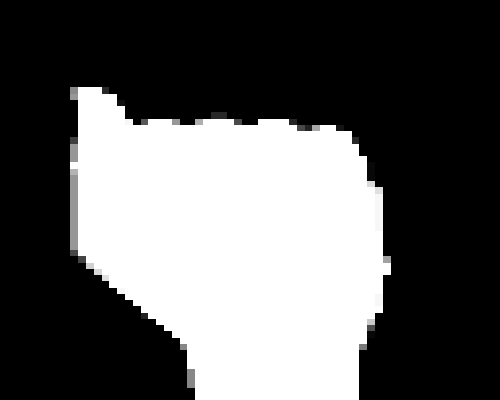

In [25]:
img=image.load_img('./test_set/A/10.png',target_size=(400,500))
img

Load The Test Image, Pre-Process It And Predict

In [26]:
from skimage.transform import resize
def detect(frame):
  img=resize(frame,(64,64,1))
  img=np.expand_dims(img,axis=0)
  if(np.max(img)>1):
    prediction=model.predict(img)
    print(prediction)
    prediction=model.predict_classes(img)
    print(prediction)

In [27]:
arr= image.img_to_array(img)


In [40]:
frame=cv2.imread('./test_set/A/10.png')
data=detect(frame)
#from google.colab.patches import cv2_imshow
cv2.imshow('name',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

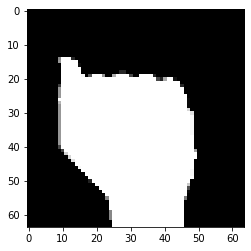

In [42]:
from matplotlib import pyplot as plt

plt.imshow(frame)
plt.show()